### <h3 style="color: #ADD8E6;">Complementaria 9: Simulación de Montecarlo</h3>


Una cadena de Markov es un proceso estocástico que experimenta transiciones de un estado a otro en un espacio de estados. Tiene la propiedad de que el estado futuro sólo depende del estado actual y no de la secuencia de acontecimientos que lo precedieron (propiedad de no memoria). La simulación de Montecarlo es un método que utiliza el muestreo aleatorio para aproximar la distribución de probabilidad de una cantidad desconocida. En el contexto de las cadenas de Markov, podemos utilizar simulaciones de Montecarlo para estimar el comportamiento a largo plazo de la cadena.

En este tutorial se desarrollarán dos maneras diferentes de obtener medidas de interés de un sistema. La primera consiste en calcular valores esperados a partir de las probabilidades obtenidas de una Cadena de Markov, y la segunda consiste en realizar una simulación de Montecarlo para generar diferentes escenarios que permitan estimar los valores esperados.

Una simulación de Montecarlo es una técnica que permite calcular medidas de desempeño de un sistema que no es determinístico. Esto se hace mediante la creación de diferentes escenarios (o réplicas) a partir de un muestreo de los componentes aleatorios del sistema. Para realizar este muestreo, utilizamos las distribuciones de probabilidad de los componentes aleatorios. Una vez generados los diferentes escenarios se pueden, por ejemplo, utilizar los resultados de cada escenario para estimar la distribución de alguna medida de desempeño o promediar los resultados para estimar el valor esperado de una medida de desempeño.

La validez de los métodos de Montecarlo se basa en la Ley de los Grandes Números y en el Teorema del Límite Central. La ley de los grandes números establece que, a medida que aumenta el número de muestras, la media muestral converge hacia la media real de la población. El teorema del límite central afirma que la distribución de la media muestral se aproxima a una distribución normal a medida que aumenta el tamaño de la muestra, independientemente de la distribución de la población. Estos teoremas garantizan que las estimaciones de Montecarlo sean más precisas a medida que aumenta el número de muestras. Sin embargo, es importante tener en cuenta que la convergencia puede ser lenta para algunos problemas, requiriendo un gran número de muestras para alcanzar el nivel de precisión deseado.

Tomemos por ejemplo el siguiente proceso estocástico modelado como una CMTD:



$$
X_n = \text{Calidad del aire al finalizar el n-ésimo día}
$$

$$
S_X = \text{\{1 (Mala), 2 (Regular), 3 (Buena)\}}
$$

$$
\mathbb{P}_{i \to j} =
\begin{bmatrix}
0.5 & 0.3 & 0.2 \\
0.3 & 0.4 & 0.3 \\
0.2 & 0.3 & 0.5
\end{bmatrix}
$$

Para crear la matriz en Python usamos el siguiente código:

In [1]:
import numpy as np

# Definir la matriz con probabilidades de transición a un paso (P)
estados = [1, 2, 3]

P = np.array([[0.5, 0.3, 0.2],
              [0.3, 0.4, 0.3],
              [0.2, 0.3, 0.5]])

P

array([[0.5, 0.3, 0.2],
       [0.3, 0.4, 0.3],
       [0.2, 0.3, 0.5]])

Hasta este momento del curso, si se desea calcular el valor esperado de la calidad del aire o el valor esperado de algún costo asociado, se ha hecho uso de las probabilidades a un paso, varios pasos o en estado estable de la cadena de Markov. Sin embargo, también es posible realizar simulaciones de este proceso estocástico para estimar estas medidas. Asumamos que al final del día de hoy la calidad de aire es Mala (i=1). Siendo así, se sabe que las probabilidades de transición de la calidad del aire para el día siguiente son:
$$
P[X_{n+1} \mid X_n = 1] =
\begin{bmatrix}
0.5 & 0.3 & 0.2
\end{bmatrix}
$$


Para hacer esto en Python, accedemos a la fila de la matriz $P$ que hace referencia al estado inicial (1).

In [2]:
# Estado actual
estado = 1
# Definir la distribución de probabilidad de la calidad de aire para el día siguiente, dado el estado actual
P[estado-1]
# Noten que restamos un 1, dado que las posiciones en Python inician en 0 

array([0.5, 0.3, 0.2])

Si deseamos simular la calidad del aire para el día de mañana, podemos generar una muestra aleatoria del estado futuro con estas probabilidades, de modo que, dado que actualmente estamos en el estado 1, con probabilidad de 0.5 se pase al estado 1, con probabilidad de 0.3 se pase al estado 2 y con probabilidad de 0.2 se pase al estado 3. Para esto, utilizamos la función `np.random.choice()`.

In [3]:
np.random.choice(estados, p=P[estado])

3

Esta función genera una muestra aleatoria del vector `estados` a partir de las probabilidades dadas por el parámetro `p`. Debido a que esta función realiza un muestreo aleatorio, cada vez que se ejecute esta función podemos obtener un resultado diferente.

Habiendo entendido cómo podemos muestrear el estado futuro a partir de las probabilidades de transición, ahora realizaremos varios muestreos para simular varios días de evolución de la calidad del aire. Debido a que la evolución depende de los muestreos aleatorios, utilizaremos una semilla para que la generación de números aleatorios sea igual cada vez que se ejecuta el código y los resultados sean reproducibles.

In [4]:
# Días de evolución
dias = 10

# Fijar la semilla para números aleatorios
np.random.seed(0)

# Definir el estado inicial
estado = 1

# Inicializar lista que contiene la calidad del aire en cada día
lista_estados = []

# Simular 10 días de evolución de la calidad del aire
for i in range(1, dias+1):
    # Guardar estado actual en la lista de estados
    lista_estados.append(estado)
    
    # Obtener estado futuro
    estado = np.random.choice(estados, p=P[estado-1])


Podemos utilizar los diferentes estados por los que pasó la cadena (almacenados en `lista_estados`) para graficar la evolución de la calidad del aire durante los 10 días.

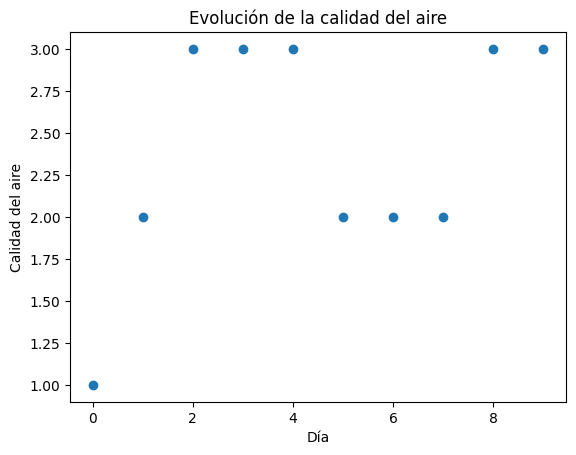

In [5]:
import matplotlib.pyplot as plt

plt.plot(lista_estados,'o')
plt.title("Evolución de la calidad del aire")
plt.xlabel("Día")
plt.ylabel("Calidad del aire")
plt.show()

En la gráfica de arriba podemos observar un posible escenario de la evolución de la calidad del aire. Sin embargo, si nos interesa calcular medidas sobre este sistema, necesitaremos de una muestra más grande. Ahora haremos la simulación con 8 escenarios, u 8 evoluciones diferentes de la CMTD. Los resultados de cada escenario los iremos guardando en una matriz para graficarlos más adelante.

In [6]:
# Días de evolución
dias = 10

# Cantidad de escenarios
escenarios = 8

# Fijar semilla para números aleatorios
np.random.seed(0)

# Inicializar matriz para almacenar la simulación de la calidad del aire para cada escenario
matriz_calidad = np.zeros((dias, escenarios), dtype=float)

for j in range(1, escenarios+1):
    # Definir el estado inicial
    estado = 1
    
    # Simular 10 días de evolución de la calidad del aire
    for i in range(1, dias+1):
        # Guardar estado actual en la lista de estados
        matriz_calidad[i-1, j-1] = estado
        
        # Obtener estado futuro
        estado = np.random.choice(estados, p=P[estado-1])



Ahora, graficaremos la evolución de la calidad del aire para cada escenario.

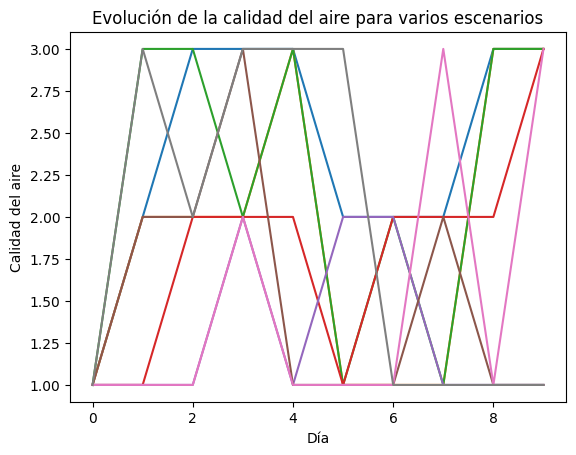

In [7]:
# Graficar cada serie (columna de la matriz)
for i in range(matriz_calidad.shape[1]):  # Iterar sobre las columnas
    plt.plot(matriz_calidad[:, i])  # Graficar la i-ésima columna

# Agregar títulos y etiquetas
plt.title("Evolución de la calidad del aire para varios escenarios")
plt.xlabel("Día")
plt.ylabel("Calidad del aire")
# Mostrar el gráfico
plt.show()

Con esto en mente, ahora se resolverá el problema del archivo “Complementaria 11 (Q).pdf” que se encuentra en Bloque Neón.

<h3 style="color: #ADD8E6;">Literal A: Modelación
</h3>

En primer lugar, se modelará la situación como una cadena de Markov de tiempo discreto. Se define la variable de estado:

$$
X_{n} = \text{Inventario de cajas de medicamento al finalizar la n-ésima semana}\\
S_{X} = \{0,1,...,100\}
$$

Sabemos que la demanda semanal sigue un proceso de Poisson con tasa $\lambda = 15 \text{ semanas}^{-1}$

$$
P[D=x] = \frac{e^{-\lambda} \cdot \lambda^{x}}{x!}\\
$$

$$
P[D \geq x]=\sum_{i=x}^{\infty}{\frac{e^{-\lambda}\cdot \lambda^{i}}{i!}}
$$

Las probabilidades de transición de un paso entre estados de esta CMTD son las siguientes:

$$
\mathbb{P}_{i \rightarrow j} = \begin{cases}
P[D=30+i-j] & \text{si } j > 0, i \leq 70 \\
P[D \geq 30+i-j] & \text{si } j = 0, i \leq 70 \\
P[D = i-j] & \text{si } j > 0, i > 70 \\
P[D \geq i-j] & \text{si } j = 0, i > 70 \\
0 & \text{d.l.c}
\end{cases}
$$

Se implementa en Python la formulación general y se crea la cadena de Markov.

In [8]:
from scipy.stats import poisson
from jmarkov.dtmc import dtmc

#Tasa de la demanda
tasa_demanda = 15

#Modelación del manejo de inventarios de Wattenspharma con cadenas de Markov
#Crear los estados
estados = range(0,101)

#*****Crear y llenar la matriz P de la política*****
matrizP = np.zeros((len(estados), len(estados)), dtype=float)

#Para la Politica -> si i<=70 solicita 30 cajas
for i in estados:
    for j in estados:
        if i<=70 and j>0:
            matrizP[i,j] = poisson.pmf(30+i-j, tasa_demanda)
        elif i<=70 and j==0:
            matrizP[i,j] = 1 - poisson.cdf(30+i-j-1, tasa_demanda)
        elif i>70 and j>0:
            matrizP[i,j] = poisson.pmf(i-j, tasa_demanda)
        elif i>70 and j==0:
            matrizP[i,j] = 1 - poisson.cdf(i-j-1, tasa_demanda)

# Crear la cadena usando el paquete jmarkov
cmtd = dtmc(matrizP)

<h3 style="color: #ADD8E6;">Literal B: Cálculo del valor esperado de inventario para cada semana y el costo total de ordenar.
</h3>

En el literal b, se pide calcular el valor esperado de inventario para cada semana y el costo total de ordenar. El valor esperado del inventario para cada semana se calcula utilizando las probabilidades en el transitorio para cada una de las siguientes 30 semanas.

$$
E[\text{Inventario}]_{n} = \sum_{i\in S_{X}}{[\alpha \mathbb{P}^{n}]_{i}\cdot i} ~~~ \forall n \in 1,2,...,30
$$

Implementando esta solución en Python:

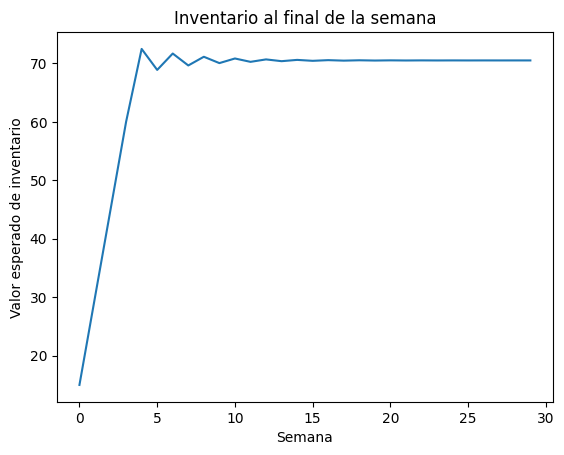

In [9]:
# Vector para guardar el valor esperado del inventario en cada semana
vEsperadoInv = []

#Creamos el vector de estados iniciales
alpha = np.zeros(101)
alpha[0] = 1

# Recorrer las semanas
for n in range(1,31):
  # Calcular la matriz de probabilidades en el transitorio
  probs = cmtd.transient_probabilities(n, alpha)
  # Calcular valor esperado y agregar al vector
  vEsperadoInv.append(np.dot(probs, estados))

plt.plot(vEsperadoInv)
plt.title("Inventario al final de la semana")
plt.xlabel("Semana")
plt.ylabel("Valor esperado de inventario")
plt.show()

Se puede observar que el valor esperado del inventario parece estabilizarse alrededor de 70 desde la semana 5.

Ahora calculamos el valor esperado del costo de ordenar total para las siguientes 30 semanas. Para este caso, se calcula el valor esperado del costo de ordenar para cada semana como la multiplicación entre el costo de ordenar y la probabilidad de ordenar, que consiste en la probabilidad de que el inventario esté entre 0 y 70:

$$
E[\text{Costo Ordenar}] = \sum_{n=1}^{30}{5000} \cdot \sum_{i=0}^{70}{[\alpha \mathbb{P}^{n}]_{i}}
$$

Implementamos esta solución de la siguiente forma:

In [10]:
#Creamos el vector de estados iniciales
alpha = np.zeros(101)
alpha[0] = 1

# Calcula el valor esperado del costo de ordenar de las siguientes 30 semanas
cOrdenar = 5000
vEsperadoOrd = 0

for n in range(1,31):
  # Calcular probabilidades en el transitorio dado el estado inicial
  probs = cmtd.transient_probabilities(n, alpha)
  
  # Calcular el valor esperado de ordenar y sumarlo al costo hasta el momento
  vEsperadoOrd = vEsperadoOrd + np.sum(probs[0:71])*cOrdenar

vEsperadoOrd

84249.96608375743

<h3 style="color: #ADD8E6;">Literal C: Inventario mediante simulación de Montecarlo.
</h3>

En este literal, empezaremos por realizar una simulación de Montecarlo para visualizar el nivel de inventario durante las próximas 30 semanas con 8 escenarios. Para esto, utilizaremos la matriz de probabilidades que creamos en el literal a. Para cada escenario, iremos guardando el inventario que se tiene en cada semana para después visualizar los resultados.

In [11]:
escenarios = 8
semanas = 30

# Inicializar matriz para almacenar la simulación del inventario para cada escenario
inventario = np.zeros((semanas, escenarios), dtype=float)

# Simular la cadena de Markov
np.random.seed(0)

for j in range(1, escenarios+1):
  
  # Definir el estado inicial (inventario inicial)
  estado =  0
  
  # Simular las transiciones por 30 semanas
  for i in range(1, semanas+1):
    
    # Guardar el inventario actual
    inventario[i-1,j-1] = estado
    
    # Obtener estado futuro
    estado = np.random.choice(estados, p=matrizP[estado])

Ahora graficaremos la evolución del nivel de inventario para cada escenario.

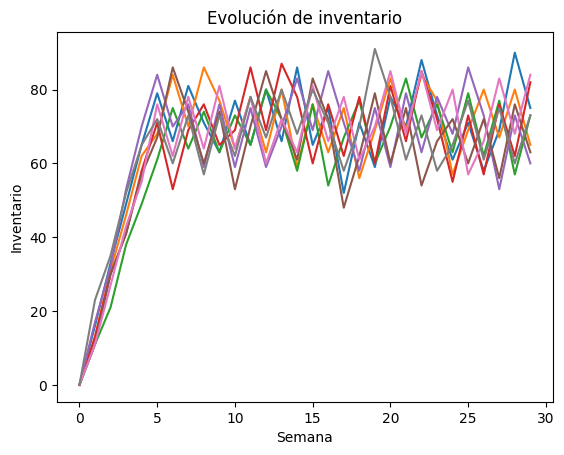

In [12]:
# Graficar cada serie (columna de la matriz)
for i in range(inventario.shape[1]):  # Iterar sobre las columnas
    plt.plot(inventario[:, i])  # Graficar la i-ésima columna

# Agregar títulos y etiquetas
plt.title("Evolución de inventario")
plt.xlabel("Semana")
plt.ylabel("Inventario")

# Mostrar el gráfico
plt.show()

Podemos observar que el inventario parece estabilizarse y oscila alrededor de las 70 cajas de medicamento, consistente con lo encontrado en el literal b.

<h3 style="color: #ADD8E6;">Literal D: Inventario al final de la semana 30 mediante simulación de Montecarlo.
</h3>

Ahora vamos a repetir la simulación pero utilizando 1000 escenarios.

In [13]:
escenarios = 1000
semanas = 30

# Inicializar matriz para almacenar la simulación del inventario para cada escenario
inventario = np.zeros((semanas, escenarios), dtype=float)

# Simular la cadena de Markov
np.random.seed(0)

for j in range(1, escenarios+1):
  
  # Definir el estado inicial (inventario inicial)
  estado =  0
  
  # Simular las transiciones por 30 semanas
  for i in range(1, semanas+1):
    
    # Guardar el inventario actual
    inventario[i-1,j-1] = estado
    
    # Obtener estado futuro
    estado = np.random.choice(estados, p=matrizP[estado])

Con los resultados de esta simulación, vamos a graficar un histograma que permita visualizar la distribución del inventario al final de la semana 30. Para esto, elegimos unicamente la fila 30 de nuestra matriz inventario para solo incluir el inventario en la semana 30.

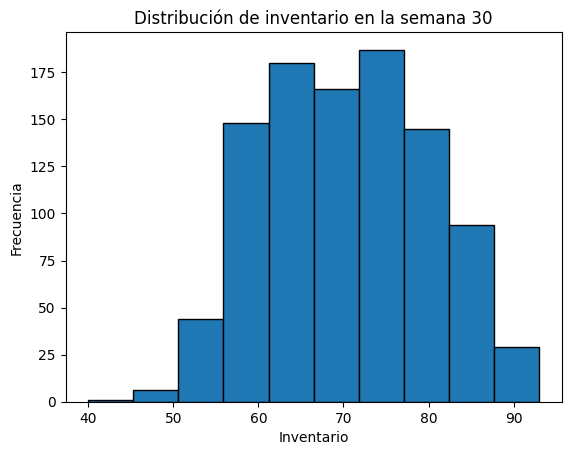

In [14]:
plt.hist(inventario[-1, :], edgecolor='black')   # [-1, :] selecciona la última fila
plt.title("Distribución de inventario en la semana 30")
plt.xlabel("Inventario")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()

Ahora, vamos a estimar el valor esperado del inventario al final de la semana 30 utilizando el inventario promedio de nuestros escenarios en la semana 30.

In [15]:
# Calcular inventario promedio
inventario_promedio =  np.mean(inventario[-1, :])

print("Inventario promedio utilizando simulación de Montecarlo: ", inventario_promedio)

Inventario promedio utilizando simulación de Montecarlo:  70.382


In [16]:
print("Valor esperado del inventario (literal b): ", round(vEsperadoInv[29],3))

Valor esperado del inventario (literal b):  70.499


Nótese que el resultado obtenido con la simulación de Montecarlo es muy cercano al obtenido en el literal b. Entre más escenarios se tengan en la simulación, más cercano estará este valor al valor esperado obtenido en el literal b.

<h3 style="color: #ADD8E6;">Literal E: Costo total de ordenar con simulación de Montecarlo.
</h3>

Para este literal, modificaremos el código desarrollado en el literal D para incluir el costo de ordenar bajo cada escenario. Como se mencionó anteriormente, Wattenspharma ordena cajas de medicamento cuando se tienen 70 o menos unidades en inventario. Por lo tanto, para cada escenario, se evaluará si hay 70 o menos unidades en inventario, y en caso de que sí, se sumaran los $5,000 que cuesta ordenar al costo total.

In [17]:
escenarios = 1000
semanas = 30

# Inicializar vector para guardar los costos de ordenar de cada escenario
vector_costos = []

# Simular la cadena de Markov
np.random.seed(0)

for j in range(1, escenarios+1):
  
  # Definir el estado inicial (inventario inicial)
  estado = 0
  # Inicializar costo de ordenar
  costo = 0
  
  # Simular las transiciones por 30 semanas
  for i in range(1, semanas+1):
    
    estado = np.random.choice(estados, p=matrizP[estado])

    # Si el inventario es menor a 70, sumar costo de ordenar
    if estado<=70:
      costo = costo + cOrdenar
    
  
  # Guardar el costo de ordenar
  vector_costos.append(costo)

Ahora calculamos el costo total de ordenar promedio de los 1000 escenarios generados.

In [18]:
# Calcular inventario promedio
costo_promedio = np.mean(vector_costos)

print("Costo total de ordenar promedio utilizando simulación de Montecarlo: $", costo_promedio)

Costo total de ordenar promedio utilizando simulación de Montecarlo: $ 84390.0


In [19]:
print("Valor esperado del costo total de ordenar: $", round(vEsperadoOrd,3))

Valor esperado del costo total de ordenar: $ 84249.966


Al igual que con el inventario promedio, el costo promedio obtenido con la simulación de Montecarlo aproxima el valor esperado obtenido en el literal b.

Universidad de los Andes | Vigilada Mineducación. Reconocimiento como Universidad: Decreto 1297 del 30 de mayo de 1964. Reconocimiento personería jurídica: Resolución 28 del 23 de febrero de 1949 Minjusticia. Departamento de Ingeniería Industrial Carrera 1 Este No. 19 A 40 Bogotá, Colombia Tel. (57.1) 3324320 | (57.1) 3394949 Ext. 2880 /2881 http://industrial.uniandes.edu.co